# Kompresija podataka

QR rastav s pivotiranjem stupaca možemo koristiti za _kompresiju (sažimanje) podataka_.

Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [1]:
# import Pkg; Pkg.add("Images")

In [2]:
using Images

┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.1/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184


┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.1/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1184


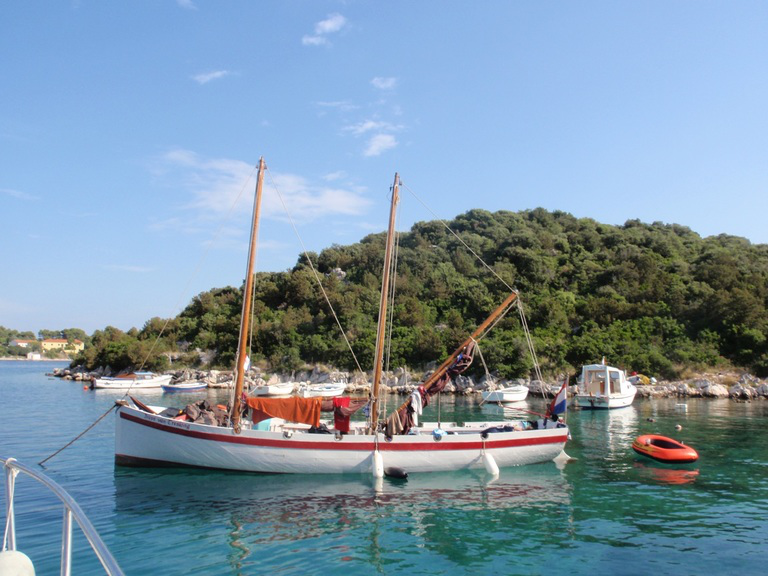

In [3]:
img=load("P8040001a.jpg")

In [4]:
# Opis podataka
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

In [5]:
img[1,1]

In [6]:
show(img[1,1])

RGB{N0f8}(0.439,0.624,0.843)

In [7]:
# Razdvojimo sliku na R, G i B komponente
channels=channelview(img)

3×576×768 reinterpret(N0f8, ::Array{RGB{N0f8},3}):
[:, :, 1] =
 0.439  0.447  0.439  0.435  0.447  …  0.886  0.886  0.89   0.894  0.894
 0.624  0.631  0.624  0.62   0.631     0.886  0.886  0.89   0.894  0.894
 0.843  0.851  0.843  0.839  0.851     0.847  0.847  0.851  0.855  0.855

[:, :, 2] =
 0.439  0.443  0.443  0.439  0.443  …  0.89   0.89   0.89   0.894  0.894
 0.624  0.627  0.627  0.624  0.627     0.89   0.89   0.89   0.894  0.894
 0.843  0.847  0.847  0.843  0.847     0.851  0.851  0.851  0.855  0.855

[:, :, 3] =
 0.443  0.439  0.447  0.447  0.439  …  0.898  0.898  0.898  0.902  0.902
 0.627  0.624  0.631  0.631  0.624     0.898  0.898  0.898  0.902  0.902
 0.847  0.843  0.851  0.851  0.843     0.859  0.859  0.859  0.863  0.863

...

[:, :, 766] =
 0.62   0.624  0.624  0.624  0.627  …  0.263  0.267  0.302  0.302  0.286
 0.769  0.773  0.773  0.773  0.769     0.447  0.451  0.478  0.478  0.463
 0.953  0.957  0.957  0.957  0.957     0.565  0.569  0.6    0.6    0.584

[:, :, 767] =


In [8]:
Red=channels[1,:,:]
Green=channels[2,:,:]
Blue=channels[3,:,:]

576×768 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.843  0.843  0.847  0.847  0.847  …  0.949  0.953  0.953  0.965  0.969
 0.851  0.847  0.843  0.839  0.839     0.953  0.957  0.957  0.965  0.965
 0.843  0.847  0.851  0.851  0.851     0.957  0.961  0.957  0.961  0.961
 0.839  0.843  0.851  0.855  0.855     0.957  0.961  0.957  0.953  0.961
 0.851  0.847  0.843  0.839  0.839     0.957  0.957  0.957  0.957  0.953
 0.847  0.847  0.843  0.843  0.843  …  0.953  0.953  0.957  0.957  0.957
 0.839  0.843  0.851  0.855  0.855     0.953  0.957  0.957  0.957  0.957
 0.847  0.847  0.847  0.847  0.851     0.957  0.957  0.957  0.957  0.953
 0.855  0.855  0.855  0.855  0.851     0.957  0.957  0.953  0.953  0.957
 0.855  0.851  0.847  0.847  0.851     0.961  0.965  0.961  0.957  0.961
 0.855  0.851  0.847  0.847  0.851  …  0.953  0.961  0.957  0.957  0.957
 0.859  0.855  0.851  0.851  0.851     0.949  0.961  0.957  0.953  0.953
 0.855  0.855  0.855  0.851  0.851     0.953  0.961  0.961  0.961  0.957


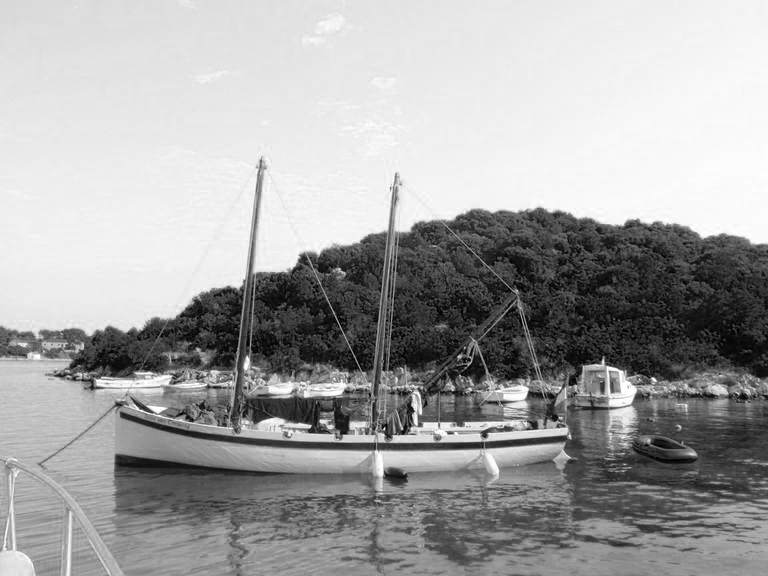

In [9]:
colorview(Gray,Blue)

In [10]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
using LinearAlgebra
R=qr(Red,Val(true))
G=qr(Green,Val(true))
B=qr(Blue,Val(true));

In [11]:
norm(R.Q*R.R[:,invperm(R.p)]-float(Red))

0.0001614425f0

In [12]:
using Plots

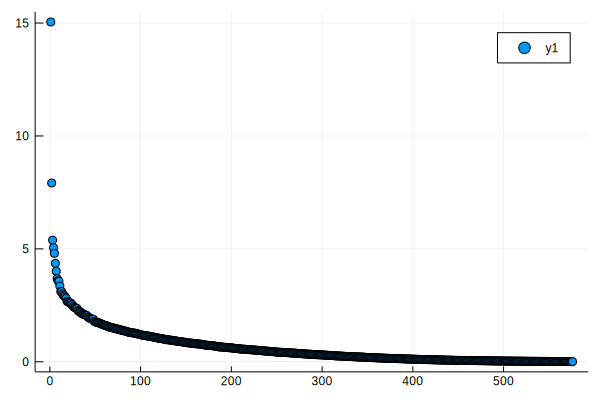

In [16]:
# Nacrtajmo dijagonalne elemente
scatter(1:length(diag(R.R,1)),abs.(diag(R.R)))

In [17]:
# Izračunajmo komprimirane matrice za svaki kanal, RedC, GreenC i BlueC
# Funkcija Matrix() je nužna radi bržeg generiranja matrice Q
k=50
RedC=Matrix(R.Q)[:,1:k]*R.R[1:k,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k]*G.R[1:k,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k]*B.R[1:k,invperm(B.p)]

576×768 Array{Float32,2}:
 0.846007  0.845906  0.846344  0.847123  …  0.952307  0.952586  0.95421 
 0.846753  0.847337  0.847957  0.848278     0.952542  0.953016  0.954359
 0.850864  0.851758  0.852974  0.853171     0.953745  0.953698  0.956007
 0.853217  0.853921  0.854728  0.853921     0.953029  0.952912  0.955145
 0.855111  0.855731  0.856358  0.855784     0.950925  0.951315  0.953951
 0.854894  0.855376  0.855883  0.856206  …  0.949433  0.949907  0.952582
 0.855159  0.855322  0.855875  0.856268     0.95544   0.955519  0.957599
 0.855549  0.856304  0.85657   0.85765      0.951908  0.951511  0.952661
 0.853055  0.853722  0.854407  0.856439     0.948733  0.948007  0.948624
 0.857237  0.857739  0.85757   0.858625     0.954571  0.953532  0.953982
 0.860174  0.860686  0.860601  0.86153   …  0.9535    0.952296  0.952383
 0.860947  0.861715  0.861924  0.862076     0.950508  0.950109  0.950441
 0.859383  0.859246  0.859719  0.859474     0.953047  0.9532    0.953628
 ⋮                       

In [18]:
norm(Red-RedC)/norm(Red)

0.10693458f0

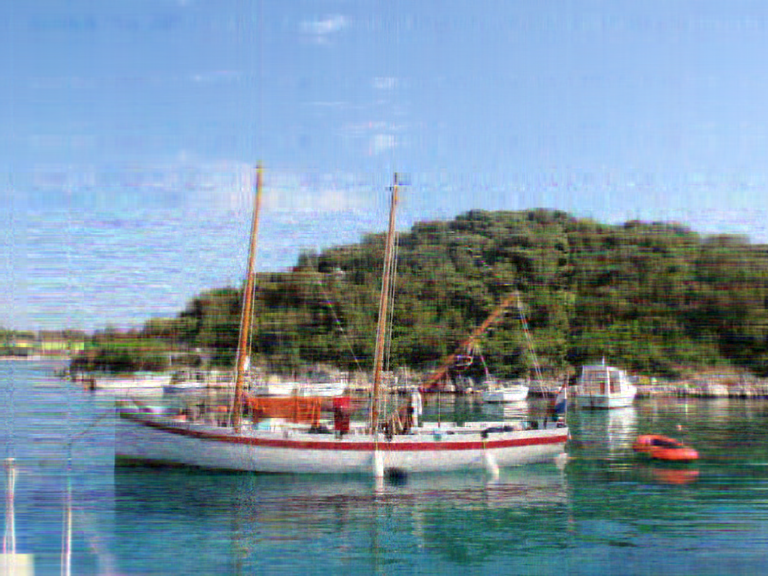

In [19]:
# Nacrtajmo komprimiranu sliku
colorview(RGB, RedC, GreenC, BlueC)

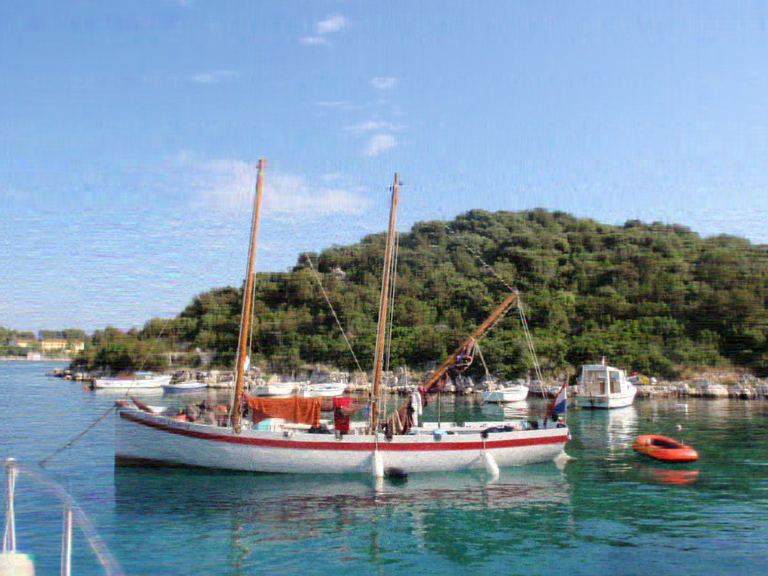

In [20]:
# Pogledajmo kako raste kvalita
k=100
k1=k
k2=k
k3=k
RedC=Matrix(R.Q)[:,1:k1]*R.R[1:k1,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k2]*G.R[1:k2,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k3]*B.R[1:k3,invperm(B.p)]
colorview(RGB,RedC,GreenC,BlueC)